<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

 ** **Защита персональных данных клиентов** 
 
В работе необходимо построить систему преобразования данных, позволяющую зашифровать исходные данные о клиентах страховой компании "Хоть потоп". Данные необходимо преобразовать таким образом, чтобы это не повлияло на качество моделей машинного обучения.
Основная задача проекта заключается в разработке метода преобразования данных.

 **Цель исследования**
 
Цель проекта заключается в разработке метода преобразования данных для их защиты, а именно:
1. Проанализировать основную информацию о клиентах.
2. Ответить на вопрос о влиянии умножения данных на обратимую матрицу на качество линейной регрессии.
3. Предложить метод преобразования данных.
4. Проверить предложенный метод и качество моделей до и после преобразования данных.

**Ход исследования**

Данные для исследования получены из одного датафрейма. В нашем распоряжении данные о клиентах, такие как пол, возраст и т.д. .

Таким образом, исследование будет состоять из следующих этапов:
- обзор данных;
- предобработка данных (при необходимости);
- анализ влияния умножения данных на обратимую матрицу на качество линейной регрессии;
- разработка метода преобразования данных;
- применение метода преобразования данных;
- проверка качества модели до и после преобразования данных по метрике R2;
- основные выводы.

## Загрузка данных

In [1]:
!pip install -q phik

Загрузка библиотек.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

warnings.filterwarnings('ignore')

Прочитаем файл и посмотрим основную информацию.

In [3]:
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Изменим тип данных в столбцах возраст и зарплата на целочисленный.

In [7]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)

Проверим данные на пропуски и дубликаты.

In [8]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [9]:
data.duplicated().sum()

153

Проверим корреляцию между основными признаками.

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


<AxesSubplot:>

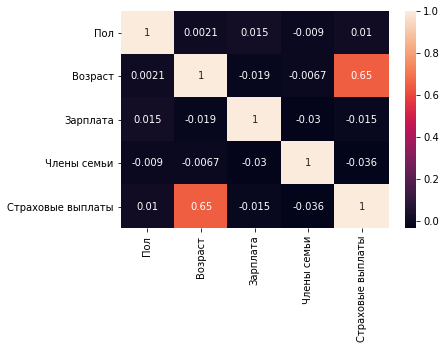

In [10]:
display(data.corr(), sns.heatmap(data.corr(), annot=True));
plt.show();

In [11]:
data.phik_matrix() 

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000000,0.000000,0.0,0.032181
Возраст,0.000000,1.000000,0.069098,0.0,0.884865
Зарплата,0.000000,0.069098,1.000000,0.0,0.000000
Члены семьи,0.000000,0.000000,0.000000,1.0,0.000000
Страховые выплаты,0.032181,0.884865,0.000000,0.0,1.000000


interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


<AxesSubplot:>

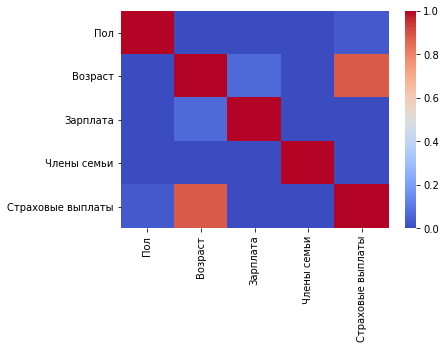

In [12]:
sns.heatmap(data.phik_matrix(), cmap='coolwarm')

In [13]:
phik_overview = data.phik_matrix(interval_cols=['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']) 

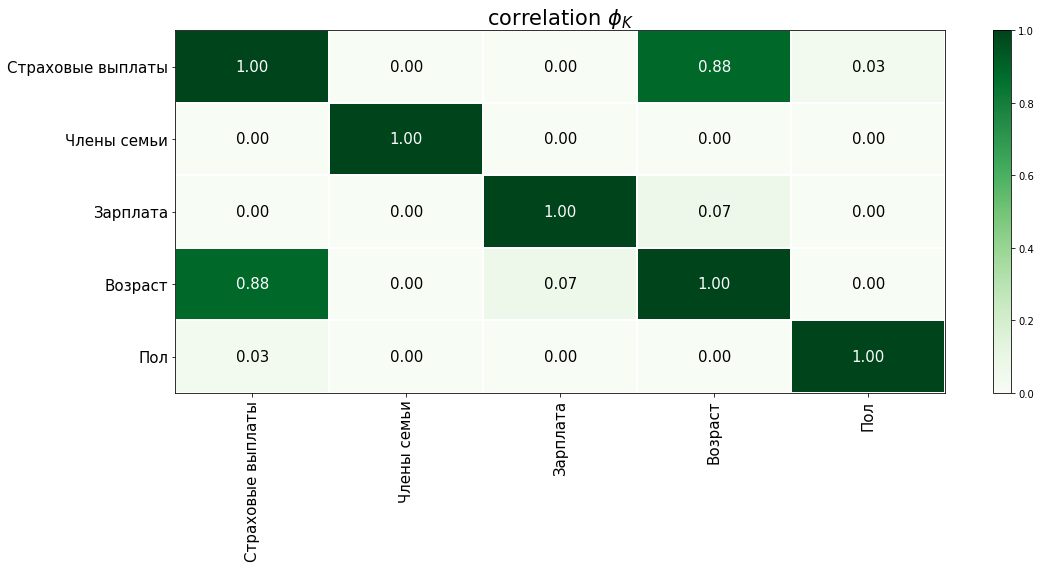

In [14]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

Данные успешно загружены и имеют подходящий тип данных. Возраст и зарплата переведены в целочисленный формат. В таблице отсутствуют лишние столбцы и пропущенные значения. В данных присутствуют дубликаты. Проверка основных статистических показателей не выявила явных выбросов. Наблюдается высокая корреляция между возрастом и страховыми выплатами.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится



**Обоснование:** 
Задача обучения линейной регрессии такая
<br><center>$w=argmin MSE(Xw,y)$</center></br>

$y$ — вектор значений целевого признака для обучающей выборки  

$argmin( )$ — функция, которая находит минимум и возвращает, при каком аргументе
он был достигнут.

Минимальное значение MSE получается, когда веса равны этой величине:
<br><center>$w=(X^TX)^{-1}X^Ty$</center></br>


1. Представим новую матрицу признаков  как произведение старой  на матрицу  (обратимую):

$$
X1 =  XP
$$

2. Подставим новое значение $X1$ в формулу $w1$:

$$
w1 = ((X P)^T X P)^{-1} (X P)^T y
$$

3. Раскроем первое произведение $ (XP)^T $:

$$
w1 = (P^T X^T X P)^{-1} P^T X^T y
$$

4. Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:

$$
w1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$

5. Раскроем скобки $ (P^T (X^T X) P)^{-1} $:

$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

6. Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):

$$
w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

7. Можно заметить, что справа получилась формула для $w$:

$$
w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

8. Подставим новое значение весов  𝑤1  в формулу для предсказаний линейной регрессии.
Предсказания модели расчитываются по формуле:

$$
a = Xw
$$

9. И получается, что $(X^T* X)^{-1} * X^T *  y = w$, и наша формула предсказаний регрессии вернулась к исходному виду:

$$
a = Xw
$$

10. Подставим в эту формулу значения $X1$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:

$$
a1 = X1w1 = XPP^{-1} w
$$

11. Так как $P$ по условию обратимая, то произведение $PP^{-1}$ снова равно $E$:

$$
a1 = XPP^{-1} w = X E w = X w = a
$$

Мы доказали, что предсказания $a1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$.<br>
Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу - нет, не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:

$$
w1 = P^{-1} w
$$

Способ №2

Для функции $w=argmin MSE(XPw1,y)$ применим полученное ранее соотношение $w1 = P^{-1} w$

Ранее было доказано, что роизведение $(P^T)^{-1} P^T$ равно $E$, следовательно формула упроститься до

$$
w=argmin MSE(Xw,y)
$$


## Алгоритм преобразования

**Алгоритм**

Создадим квадратную матрицу, размер которой соответствует количеству признаков, и заполним ее случайными числами. Затем проверим, является ли эта матрица обратимой, то есть имеет обратную матрицу. Если матрица обратима, умножим наши признаки на эту матрицу.

Важно отметить, что требуется, чтобы матрица была обратимой для успешно восстановления исходных данных. В противном случае, если матрица необратима, мы не сможем расшифровать наши данные.

1. Создаём рандомную матрицу $P$<br>
2. Проверяем её на обратимость <br>
3. Создаём новую матрицу данных $M$ <br>
4. Ищем метрики качества $R2 score$ на исходных данных и на преобразованных<br>
5. Опишем вывод полученных результатов

**Обоснование**

Мы можем ожидать, что качество линейной регрессии будет одинаковым до и после преобразования данных. Преобразование данных не влияет на способность модели предсказывать целевой признак. Однако, эти действия имеют важное значение для защиты персональных данных клиентов. В случае возможной утечки данных, преобразование матрицы признаков обеспечивает дополнительную безопасность, поскольку злоумышленникам эти данные будут бесполезны.

Как было доказано, умножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны.

## Проверка алгоритма

Выделим целевой показатель и признаки.

In [15]:
features = data.drop(["Страховые выплаты"], axis=1)
target = data["Страховые выплаты"]
features.shape, target.shape

((5000, 4), (5000,))

Разделим данные на обучающую и тестовую выборки в соотношении 80:20:

In [16]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

Сгенерируем матрицу.Необходимо создать обратимую матрицу размером 4 на 4. Потому что при умножении важно, чтобы число столбцов было равно числу строк первой марицы - матрицы признаков.

При этом важно не создать случайно необратимую матрицу. Для существования обратимой матрицы необходимо, чтобы ее определитель не был равен нулю.

In [17]:
matrix = np.random.randint(100,size = (4, 4))
matrix

array([[77, 96, 88, 73],
       [30, 31, 68, 59],
       [14, 32, 81, 13],
       [11, 32,  9, 42]])

Получим обратную матрицу.

In [18]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[ 0.01892896,  0.01275575, -0.0265395 , -0.04260453],
       [ 0.00450903, -0.03075604,  0.0175966 ,  0.02992122],
       [-0.00383798,  0.00696052,  0.01140957, -0.00663862],
       [-0.00757061,  0.01860084, -0.00890102,  0.0135933 ]])

In [19]:
det = np.linalg.det(matrix_inv)
det

-1.9473241040556555e-07

In [20]:
def get_rand_matrix():
    det = 0
    while det == 0:
        
        matrix = np.random.normal(size=(data.shape[1]-1, 
                                        data.shape[1]-1))
        det = np.linalg.det(matrix)
    return matrix
    

P = get_rand_matrix()
print('Матрица P:\n', P)

print('\nПроверка на единичную матрицу:')
display((P @ np.linalg.inv(P)).round(3))

Матрица P:
 [[-3.50711977e-01  6.59923218e-01 -9.87337188e-01  5.75352108e-02]
 [-1.05557220e-02 -1.90700182e+00  6.46217376e-02 -2.05949229e-01]
 [ 3.97551005e-01  5.27126997e-01 -6.23309550e-04 -6.97342864e-01]
 [-1.97615695e-01 -1.65822074e+00  5.61452879e-03 -1.59674898e+00]]

Проверка на единичную матрицу:


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1., -0.,  0.],
       [-0., -0.,  1., -0.],
       [ 0., -0., -0.,  1.]])

Обучим модель линейной регресии.

In [21]:
model = LinearRegression(normalize=True).fit(features_train, target_train)
predictions = model.predict(features_train)
r2_score_value = r2_score(target_train, predictions)
print(f"R2_score: {r2_score_value:.13f}")

R2_score: 0.4208028774219


Зашифруем признаки.

In [22]:
features_2 = features_train @ matrix_inv
features_2.head()

,0,1,2,3
4227,-189.522673,343.314447,563.940431,-327.395781
4676,-243.140790,440.128540,724.017353,-419.750757
800,-111.891748,202.004649,333.871906,-192.607417
3671,-142.582069,257.596504,425.201229,-245.626634
4193,-148.412633,268.572284,442.007741,-256.136743


Произведем моделирование на измененных признаках.

In [23]:
model_2 = LinearRegression()
model_2.fit(features_2, target_train)
predictions = model_2.predict(features_2)
r2_2 = r2_score(target_train, predictions)
print(f'Метрика R2 для матрицы XP равняется {r2_2}')

Метрика R2 для матрицы XP равняется 0.4208028774218867


Метрики R2 обеих моделей почти одинаковые, следовательно умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования.

## Общий вывод

В работе необходимо было построить систему преобразования данных, позволяющую зашифровать исходные данные о клиентах страховой компании "Хоть потоп". Целью работы заключалась в разработке метода преобразования данных для их защиты, не влияющего на качество моделей машинного обучения.

В ходе работы был исследован исходный датасет, содержащий данные клиентах страховой компании. Данные по возрасту и зарплате переведены в целочисленный формат. Установлено, что в таблице отсутствуют лишние столбцы и пропущенные значения. В данных присутствуют дубликаты, оставленные ьез изменения. Проверка основных статистических показателей не выявила явных выбросов. Наблюдается высокая корреляция между возрастом клиентов и страховыми выплатами.

Дано математическое обоснование отсутсвия влияния умножения данных на обратимую матрицу на качество линейной регрессии.

Представлен алгоритм преобразования данных, заключающийся в создании квадратной матрицы, размер которой соответствует количеству признаков, и заполнении ее случайными числами, последующей проверке является ли эта матрица обратимой. Если матрица обратима, возможно умножение признаков на данную матрицу.


Проведена проверка алгоритма, заключающаяся в получении моделей линенйной регрессии до и после преобразования данных. Метрики R2 обеих моделей почти идентичные, следовательно умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования.

